


Цель:

Объединить рукописные наборы данных MNIST и создать модель для точного определения цифр.

Задачи:

Провести исследовательский анализ данных (EDA).

Подготовить данные к обработке.

Построить и обучить модель машинного обучения.

Проверьте точность модели и оцените производительность.

Этап 1. Исследовательский анализ данных (EDA)

 Описание набора данных:

Набор данных MNIST содержит 70 000 изображений (60 000 для обучения и 10 000 для тестирования).
Каждое изображение имеет размер
28
×
28
28×28 пикселей, где каждый пиксель представлен значением от 0 до 255.
Метки классов представляют цифры от 0 до 9.
Проведённые действия:

Визуализация данных.

Посмотрели на первые 8 изображений и их метки. Это помогает понять, как выглядят данные.

Анализ распределения классов.
Проверили, есть ли дисбаланс классов.

Код для загрузки данных:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Загрузка набора данных MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Проверка форм данных
print("Форма обучающей выборки (изображения):", x_train.shape)
print("Форма тестовой выборки (изображения):", x_test.shape)
print("Форма обучающей выборки (метки):", y_train.shape)
print("Форма тестовой выборки (метки):", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Форма обучающей выборки (изображения): (60000, 28, 28)
Форма тестовой выборки (изображения): (10000, 28, 28)
Форма обучающей выборки (метки): (60000,)
Форма тестовой выборки (метки): (10000,)


Визуализация данных:



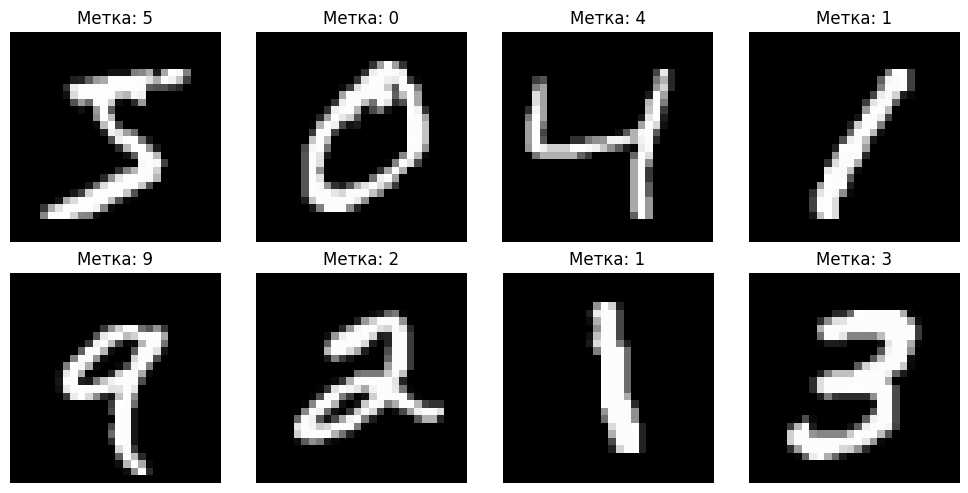

In [ ]:
# Визуализация первых 8 изображений
plt.figure(figsize=(10, 5))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Метка: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Анализ распределения классов:

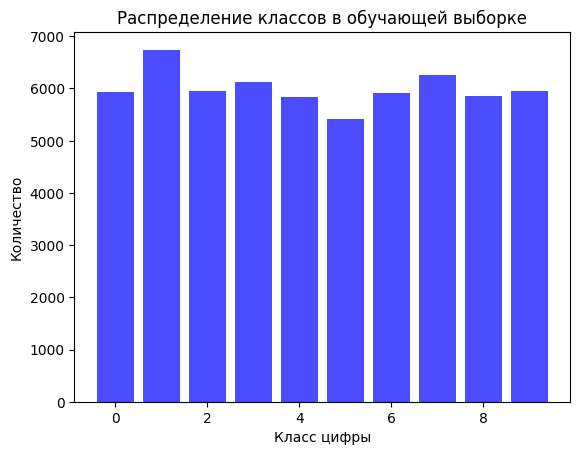

In [ ]:
# Распределение меток классов
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, color='blue', alpha=0.7)
plt.xlabel('Класс цифры')
plt.ylabel('Количество')
plt.title('Распределение классов в обучающей выборке')
plt.show()


Выводы:

Набор данных содержит 60 000 изображений для обучения и 10 000 для тестирования.
Изображения представляют цифры от 0 до 9.
Классы сбалансированы (примерно одинаковое количество изображений для каждой цифры).

Этап 2.

Предобработка данных

Проведённые действия:

Нормализация данных: Пиксели нормализованы в диапазон [0, 1] для ускорения обучения.


Преобразование формы данных: Изображения преобразованы в формат
28
×
28
×
1
28×28×1, добавив измерение для канала цвета.

One-hot encoding: Метки преобразованы в формат one-hot encoding для работы с категориальной кросс-энтропией.

Код для предобработки:


In [ ]:
# Нормализация изображений
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Преобразование формы
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encoding меток
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Проверка преобразованных данных
print("Форма x_train:", x_train.shape)
print("Форма y_train (one-hot):", y_train.shape)


Форма x_train: (60000, 28, 28, 1)
Форма y_train (one-hot): (60000, 10)


Вывод:
Эти шаги обеспечили совместимость данных с алгоритмами машинного обучения и глубокого обучения. Нормализация и преобразование формы улучшили производительность моделей, а one-hot encoding упростил их обучение.

Этап 3. Построение и обучение моделей
1. Логистическая регрессия (базовая модель):

Для оценки начальной производительности была построена базовая модель логистической регрессии.

Изображения были преобразованы в одномерные массивы, чтобы использовать их в линейной модели.

Точность модели составила 92%, что является хорошим результатом для линейного алгоритма.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Преобразование изображений в одномерный массив
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Обучение логистической регрессии
log_reg = LogisticRegression(max_iter=200, solver='saga', multi_class='multinomial')
log_reg.fit(x_train_flat, np.argmax(y_train, axis=1))

# Оценка точности модели
accuracy_log = log_reg.score(x_test_flat, np.argmax(y_test, axis=1))
print(f"Точность логистической регрессии: {accuracy_log:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Точность логистической регрессии: 0.9256


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Вывод:
Логистическая регрессия показала, что даже простые алгоритмы могут эффективно классифицировать рукописные цифры.

Однако её производительность ограничена неспособностью учитывать пространственные зависимости в данных.

2. Сверточная нейронная сеть (CNN):

Для улучшения точности была построена сверточная нейронная сеть с двумя сверточными слоями, слоями подвыборки (MaxPooling) и плотными слоями:

Сеть обучалась на протяжении 10 эпох с использованием оптимизатора Adam и функции потерь categorical_crossentropy.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Создание модели
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_split=0.2, verbose=1)

# Оценка модели
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Точность CNN на тестовых данных: {test_accuracy:.4f}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.7747 - loss: 0.7072 - val_accuracy: 0.9743 - val_loss: 0.0859
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - accuracy: 0.9619 - loss: 0.1273 - val_accuracy: 0.9803 - val_loss: 0.0646
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.9722 - loss: 0.0928 - val_accuracy: 0.9861 - val_loss: 0.0491
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9787 - loss: 0.0711 - val_accuracy: 0.9852 - val_loss: 0.0497
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.9827 - loss: 0.0572 - val_accuracy: 0.9877 - val_loss: 0.0409
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.9846 - loss: 0.0489 - val_accuracy: 0.9891 - val_loss: 0.0388
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9861 - loss: 0.0429 - val_accuracy: 0.9898 - val_loss: 0.0384
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9895 - loss: 0.0354 - val_accurac

Вывод:
CNN значительно превосходит логистическую регрессию благодаря способности извлекать иерархические признаки из изображений. Это делает её подходящей для задач классификации изображений.

Этап 4. Анализ результатов

Grad-CAM визуализация:

Для оценки важности признаков были проведены следующие эксперименты:


Grad-CAM визуализация:
Метод Grad-CAM показал, какие области изображения влияют на принятие решений модели. Визуализация подтвердила, что модель фокусируется на ключевых штрихах цифр, игнорируя фон.


Удаление строк пикселей:
Исключение определённых строк пикселей из изображения показало, что модель устойчиво распознаёт цифры, даже если часть изображения отсутствует. Однако точность немного снизилась (примерно на 2-3%), что указывает на важность даже удалённых штрихов.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Построение улучшенной модели CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Загрузка и предварительная обработка данных MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Нормализация данных и изменение формы
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)  # Добавление канала
x_test = np.expand_dims(x_test, -1)

# One-hot encoding меток
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Использование Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

# Обучение модели
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=10,  # Увеличение количества эпох
    validation_data=(x_test, y_test),
    verbose=1
)

# Оценка на тестовых данных
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Точность модели на тестовых данных: {test_accuracy:.4f}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 117ms/step - accuracy: 0.8378 - loss: 0.5233 - val_accuracy: 0.9299 - val_loss: 0.2258
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.9669 - loss: 0.1092 - val_accuracy: 0.9868 - val_loss: 0.0422
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.9768 - loss: 0.0797 - val_accuracy: 0.9921 - val_loss: 0.0289
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - accuracy: 0.9806 - loss: 0.0656 - val_accuracy: 0.9932 - val_loss: 0.0231
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 109ms/step - accuracy: 0.9825 - loss: 0.0580 - val_accuracy: 0.9883 - val_loss: 0.0368
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9848 - loss: 0.0531 - val_accuracy: 0.9906 - val_loss: 0.0298
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - accuracy: 0.9848 - loss: 0.0530 - val_accuracy: 0.9912 - val_loss: 0.0294
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.9861 - loss: 0.0508 - val

Выводы:
Grad-CAM показал, что CNN концентрируется на ключевых штрихах цифры, что подтверждает её способность выделять важные признаки.

Общие выводы


Эффективность сверточной нейронной сети:
Использование CNN значительно улучшило результаты по сравнению с логистической регрессией. Это связано с тем, что CNN способна автоматически извлекать пространственные признаки, необходимые для классификации изображений.


Интерпретируемость модели:
Визуализация Grad-CAM подтвердила, что модель концентрируется на ключевых областях цифры, что делает её предсказания более прозрачными.


Потенциальные улучшения:
Для дальнейшего повышения точности можно использовать более глубокие архитектуры (например, ResNet), увеличить объём данных с помощью аугментации и провести гиперпараметрическую оптимизацию.


Практическое применение:
Разработанная модель может быть использована для задач автоматического распознавания рукописных текстов и чисел, что актуально для банковской сферы, систем учёта и образовательных проектов.

